Uždarame miestelyje, kuriame gyvena n žmonių, plinta užkrečiama liga. 
Tarkime, kad x(t) žymi užsikrėtusių žmonių skaičių laiko momentu t, o
ligos sklidimo greitis proporcingas sveikų ir užsikrėtusių žmonių skaičių
sandaugai, kai taikoma proporcingumo konstanta k. Reikia rasti, kaip  kinta užsikrėtusių žmonių skaičius x(t), jeigu žinoma, kad 

dx/dt=kx(n+1-x)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.integrate as sci

In [2]:
def f(t, x, k, n):
  return k*x*(n+1-x)

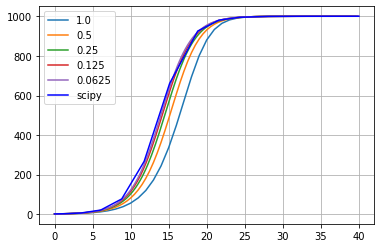

In [22]:
Tmax = 40
k = 0.0005
n = 1000
x0 = 1. # bent vienas uzsikretes


#dValues = [1.0, 1./2,  1./4,  1./8,  1./16,   1./32]

dValues = [1., 0.5, 0.25, 0.125, 0.0625]
#dValues = [1.0, 2.0,4.0, 5.75]
for dt in dValues:
  ttt = np.arange(0, Tmax, dt)
  X = np.zeros_like(ttt)
  X[0] = x0
  for i in range(1, len(ttt)):
    X[i] = X[i-1]+dt*f(ttt[i-1], X[i-1], k, n)

  plt.plot(ttt, X, label = dt)

sol = sci.solve_ivp(f,(0,Tmax),[x0], args = (k,n))
plt.plot(sol.t, sol.y[0], 'b-', label = 'scipy') 

plt.legend()
plt.grid()










plt.show()

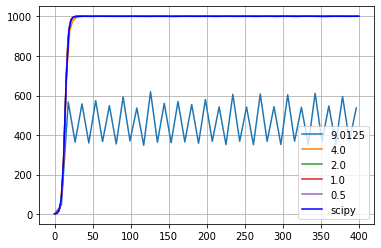

In [37]:
Tmax = 400
k = 0.0005
n = 1000
x0 = 1. # bent vienas uzsikretes
dValues = [9.0125 ,4.0, 2.0,1.0, 0.5]
#dValues = [4.0, 2.0, 1.]
for dt in dValues:
  ttt = np.arange(0, Tmax, dt)
  X = np.zeros_like(ttt)
  X[0] = x0
  y = x0
  for i in range(1, len(ttt)): 
    #X[i]= X[i-1]+dt*f(ttt[i-1], X[i-1], k, n)
    dy = f(ttt[i-1],y , k, n)
    yz = y+dt/2*dy
    dyz = f(ttt[i-1]+dt/2, yz, k, n)
    yzz = y+dt/2*dyz
    dyzz = f(ttt[i-1]+dt/2, yzz, k, n)
    yzzz = y+dt*dyzz
    dyzzz = f(ttt[i-1] + dt,yzzz , k, n)
    y = y + dt*(dy+2*dyz+2*dyzz+dyzzz)/6
    X[i] = y
  plt.plot(ttt, X, label = dt)

sol = sci.solve_ivp(f,(0,Tmax),[x0], args = (k,n))
plt.plot(sol.t, sol.y[0], 'b-', label = 'scipy')

plt.legend()
plt.grid()



plt.show()

















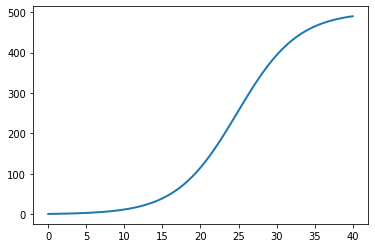

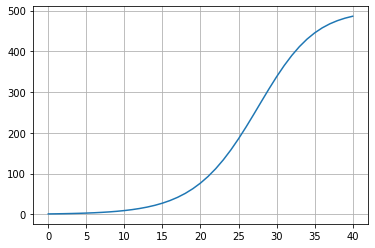

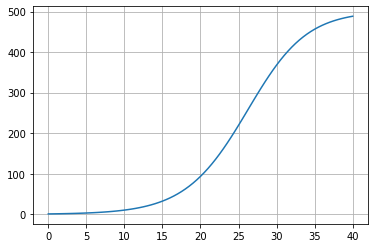

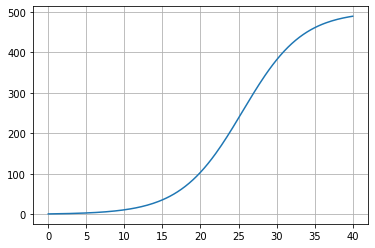

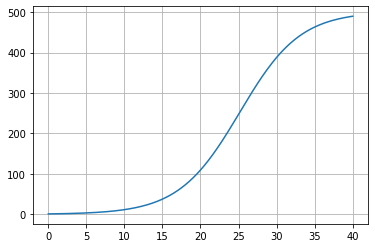

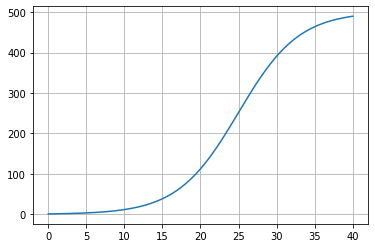

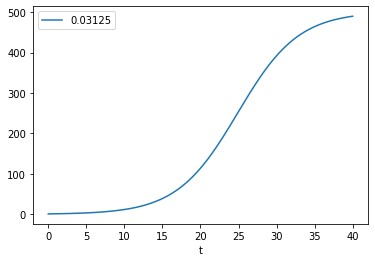

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Euler's method

def df(y, t, k, n):
  return k*y*(n+1-y)


k = 0.0005
n = 500
y0 = 1
Tmax = 40

ttt = np.linspace(0, Tmax, 100)
sol = odeint(df, y0, ttt, args = (k, n))
plt.plot(ttt, sol, label = "standard solution", linewidth = 2)

DT = [0.025, 0.05, 0.1, 0.2, 0.4, 0.8]
DT=[1., 1./2, 1./4, 1./8, 1./16, 1./32]
for dt in DT:
  n_iterations = int(Tmax/dt)
  T = np.zeros((n_iterations +1, 1))
  Y = np.zeros_like(T)
  Y[0] = y0
  for i in range(n_iterations):
    t = i*dt
    y = Y[i]
    y = y + dt*df(y, t, k, n)
    Y[i+1] = y
    T[i+1] = (i+1)*dt
  plt.figure()
  plt.plot(T, Y, label = str(dt))
  plt.grid()

plt.legend()
plt.xlabel('t')
plt.grid()